In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,best_of,teams,location,map1,map2,map3,map4,map5,team1_player1_rating,team1_player1_DPR,team1_player1_KAST,team1_player1_impact,team1_player1_ADR,team1_player1_KPR,team1_player2_rating,team1_player2_DPR,team1_player2_KAST,team1_player2_impact,team1_player2_ADR,team1_player2_KPR,team1_player3_rating,team1_player3_DPR,team1_player3_KAST,team1_player3_impact,team1_player3_ADR,team1_player3_KPR,team1_player4_rating,team1_player4_DPR,team1_player4_KAST,team1_player4_impact,team1_player4_ADR,team1_player4_KPR,team1_player5_rating,team1_player5_DPR,team1_player5_KAST,team1_player5_impact,team1_player5_ADR,team1_player5_KPR,team2_player1_rating,team2_player1_DPR,team2_player1_KAST,team2_player1_impact,team2_player1_ADR,team2_player1_KPR,team2_player2_rating,team2_player2_DPR,team2_player2_KAST,team2_player2_impact,team2_player2_ADR,team2_player2_KPR,team2_player3_rating,team2_player3_DPR,team2_player3_KAST,team2_player3_impact,team2_player3_ADR,team2_player3_KPR,team2_player4_rating,team2_player4_DPR,team2_player4_KAST,team2_player4_impact,team2_player4_ADR,team2_player4_KPR,team2_player5_rating,team2_player5_DPR,team2_player5_KAST,team2_player5_impact,team2_player5_ADR,team2_player5_KPR,team1_points,team2_points,team1_wins,team2_wins,prize_money,prize_qualification
0,Best of 3 (Online),3+,Oceania (Online),Default,Inferno,Vertigo,NaN,NaN,0.94,0.75,0.665,0.98,71.2,0.63,0.93,0.76,0.657,0.98,71.5,0.63,1.09,0.68,0.691,1.09,80.6,0.72,1.13,0.64,0.709,1.16,77.0,0.73,0.95,0.71,0.670,0.96,69.6,0.63,0.99,0.69,0.691,0.93,72.5,0.64,1.02,0.68,0.684,1.04,75.0,0.70,1.02,0.71,0.680,1.07,74.1,0.67,0.80,0.74,0.640,0.93,71.0,0.56,1.06,0.70,0.702,1.05,78.2,0.71,1,2,False,True,0,1
1,Best of 1,18,Europe (Online),Default,NaN,NaN,NaN,NaN,0.94,0.69,0.683,0.83,70.1,0.58,1.10,0.65,0.703,1.22,77.4,0.75,1.03,0.67,0.702,0.98,72.8,0.67,0.99,0.65,0.708,0.89,68.9,0.61,0.99,0.68,0.694,0.95,69.5,0.64,1.14,0.70,0.688,1.29,82.8,0.75,1.06,0.66,0.713,1.01,76.1,0.67,0.91,0.72,0.653,0.95,70.8,0.64,1.07,0.66,0.690,1.15,75.0,0.73,1.06,0.67,0.695,1.03,75.9,0.70,1,0,True,False,0,1
2,Best of 3 (Online),2+,Europe (Online),Nuke,Train,Overpass,NaN,NaN,1.05,0.64,0.705,1.01,71.7,0.67,0.99,0.71,0.687,0.93,73.7,0.67,0.91,0.71,0.667,0.83,70.4,0.62,0.93,0.71,0.667,0.87,69.3,0.60,0.98,0.69,0.694,0.94,70.3,0.63,0.94,0.70,0.657,0.98,75.3,0.66,1.02,0.72,0.707,1.03,74.1,0.67,0.92,0.70,0.684,0.97,71.2,0.63,0.98,0.70,0.671,1.00,69.3,0.65,0.93,0.70,0.677,0.91,67.8,0.56,0,2,False,True,1500,0
3,Best of 3,8,Europe (Online),Dust2,Train,Mirage,NaN,NaN,0.90,0.66,0.695,0.87,66.4,0.59,0.99,0.69,0.707,1.07,80.2,0.69,1.07,0.65,0.701,1.16,73.9,0.73,1.12,0.68,0.728,1.12,81.4,0.72,1.06,0.66,0.706,1.03,76.0,0.69,1.00,0.71,0.672,1.04,73.3,0.66,1.11,0.63,0.706,1.12,74.4,0.72,1.01,0.67,0.683,1.00,72.1,0.67,1.01,0.67,0.679,0.96,73.3,0.67,0.93,0.67,0.686,0.84,66.2,0.59,1,2,False,True,10000,0
4,Best of 3,12,North America (Online),Train,Nuke,Inferno,NaN,NaN,0.89,0.68,0.689,0.85,68.0,0.61,1.10,0.70,0.693,1.19,80.7,0.72,1.13,0.63,0.709,1.19,74.2,0.73,1.05,0.69,0.699,1.16,77.6,0.72,1.16,0.65,0.728,1.17,81.4,0.75,1.09,0.64,0.689,1.03,76.6,0.74,1.11,0.65,0.706,1.08,76.7,0.76,0.97,0.68,0.686,0.94,71.7,0.66,0.98,0.65,0.696,0.88,70.4,0.67,1.12,0.62,0.698,1.10,72.0,0.74,1,2,False,True,1000000,0


In [3]:
train.describe(include = 'object')

,best_of,teams,location,map1,map2,map3,map4,map5
count,3786,3782,3782,3786,3324,3310,80,80
unique,11,23,44,9,10,11,8,8
top,Best of 3,16,Europe (Online),Inferno,Inferno,Inferno,Mirage,Nuke
freq,2626,1109,2373,668,572,629,15,13


In [4]:
train.describe()

,team1_player1_rating,team1_player1_DPR,team1_player1_KAST,team1_player1_impact,team1_player1_ADR,team1_player1_KPR,team1_player2_rating,team1_player2_DPR,team1_player2_KAST,team1_player2_impact,team1_player2_ADR,team1_player2_KPR,team1_player3_rating,team1_player3_DPR,team1_player3_KAST,team1_player3_impact,team1_player3_ADR,team1_player3_KPR,team1_player4_rating,team1_player4_DPR,team1_player4_KAST,team1_player4_impact,team1_player4_ADR,team1_player4_KPR,team1_player5_rating,team1_player5_DPR,team1_player5_KAST,team1_player5_impact,team1_player5_ADR,team1_player5_KPR,team2_player1_rating,team2_player1_DPR,team2_player1_KAST,team2_player1_impact,team2_player1_ADR,team2_player1_KPR,team2_player2_rating,team2_player2_DPR,team2_player2_KAST,team2_player2_impact,team2_player2_ADR,team2_player2_KPR,team2_player3_rating,team2_player3_DPR,team2_player3_KAST,team2_player3_impact,team2_player3_ADR,team2_player3_KPR,team2_player4_rating,team2_player4_DPR,team2_player4_KAST,team2_player4_impact,team2_player4_ADR,team2_player4_KPR,team2_player5_rating,team2_player5_DPR,team2_player5_KAST,team2_player5_impact,team2_player5_ADR,team2_player5_KPR,team1_points,team2_points,prize_money,prize_qualification
count,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3.786000e+03,3786.000000
mean,1.024704,0.669522,0.698563,1.049097,74.901506,0.684422,1.033592,0.673423,0.699800,1.054392,75.093397,0.687562,1.056952,0.666836,0.702275,1.075903,75.787295,0.697644,1.055663,0.671030,0.702286,1.067934,75.784284,0.694966,1.043819,0.673307,0.699010,1.048048,74.679741,0.684099,1.016918,0.673513,0.695572,1.038352,74.422372,0.679345,1.027240,0.676165,0.697408,1.044728,74.762890,0.683896,1.047528,0.669728,0.699559,1.062425,75.176915,0.691437,1.046931,0.676064,0.699216,1.058362,75.357052,0.689952,1.036889,0.677060,0.695934,1.041260,74.405230,0.680909,2.723983,2.452985,7.909182e+04,0.208399
std,0.076340,0.034043,0.020522,0.114582,4.655694,0.050581,0.073577,0.031811,0.020729,0.106033,4.519637,0.049856,0.079027,0.036980,0.021557,0.107590,4.691432,0.049706,0.078342,0.037284,0.021923,0.105841,4.348547,0.048833,0.084086,0.036556,0.024282,0.118429,5.231766,0.055551,0.077465,0.035755,0.022957,0.115259,4.704061,0.051576,0.075047,0.033363,0.022694,0.104600,4.484705,0.049022,0.082838,0.038682,0.023923,0.112102,4.784012,0.051279,0.082094,0.037449,0.023943,0.111520,4.639501,0.052321,0.090000,0.038539,0.027812,0.123429,5.497055,0.059027,4.244464,4.113840,1.823623e+05,0.406217
min,0.500000,0.580000,0.500000,0.480000,46.200000,0.360000,0.490000,0.540000,0.489000,0.480000,46.700000,0.320000,0.580000,0.540000,0.463000,0.340000,46.700000,0.410000,0.550000,0.540000,0.521000,0.390000,40.800000,0.350000,0.430000,0.580000,0.462000,0.280000,35.100000,0.280000,0.410000,0.580000,0.389000,0.380000,43.900000,0.360000,0.280000,0.560000,0.405000,0.200000,35.500000,0.240000,0.500000,0.480000,0.381000,0.160000,19.000000,0.140000,0.470000,0.540000,0.486000,0.200000,23.300000,0.200000,0.240000,0.580000,0.316000,0.110000,36.900000,0.320000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.980000,0.650000,0.689000,0.980000,72.500000,0.660000,0.990000,0.650000,0.687000,0.980000,72.200000,0.660000,1.010000,0.650000,0.689000,1.020000,73.100000,0.670000,1.010000,0.650000,0.691000,1.010000,73.100000,0.670000,1.000000,0.650000,0

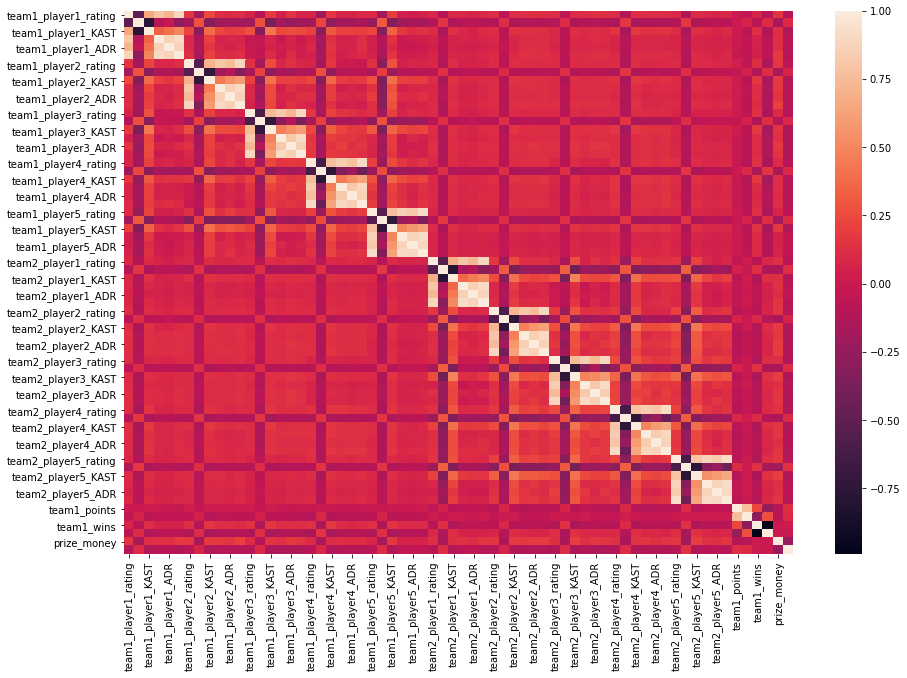

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr())
plt.show()

In [6]:
# Scikit normalizers/encoders
normalizer = Normalizer()
pca10 = PCA(n_components=10)
pca1 = PCA(n_components=1)
encoder = OneHotEncoder(handle_unknown="ignore")

# numerical values
train_numpy = train.drop(columns=["best_of","teams","location","map1","map2","map3","map4","map5","team1_points","team2_points","team1_wins","team2_wins"]).to_numpy()
train_numpy_normalized = normalizer.fit_transform(train_numpy)
train_numpy_pca10 = pca10.fit_transform(train_numpy_normalized)
train_numpy_pca1 = pca1.fit_transform(train_numpy_normalized)
print("Explained variances", pca10.explained_variance_ratio_.cumsum())

# categorical values
train_encoded = encoder.fit_transform(train[["best_of","teams","location","map1","map2","map3","map4","map5"]])

# concatenate
train_numpy_normalized = np.concatenate((train_numpy_normalized, train_encoded.toarray()), axis=1)
train_numpy_pca10 = np.concatenate((train_numpy_pca10, train_encoded.toarray()), axis=1)
train_numpy_pca1 = np.concatenate((train_numpy_pca1, train_encoded.toarray()), axis=1)
train_numpy = np.concatenate((train_numpy, train_encoded.toarray()), axis=1)
train_target = train["team1_wins"].astype(int).to_numpy()

Explained variances [0.9968814  0.9975945  0.99803924 0.99834908 0.9986556  0.99893344
 0.99919764 0.99942375 0.99963597 0.99982851]


In [7]:
# numerical values
test_numpy = test.drop(columns=["best_of","teams","location","map1","map2","map3","map4","map5","team1_points","team2_points","team1_wins","team2_wins"]).to_numpy()
test_numpy_normalized = normalizer.transform(test_numpy)
test_numpy_pca10 = pca10.fit_transform(test_numpy_normalized)
test_numpy_pca1 = pca1.fit_transform(test_numpy_normalized)

# categorical values
test_encoded = encoder.transform(test[["best_of","teams","location","map1","map2","map3","map4","map5"]])

# concatenate
test_numpy = np.concatenate((test_numpy, test_encoded.toarray()), axis=1)
test_target = test["team1_wins"].astype(int).to_numpy()
print(test_numpy.shape)

(1263, 192)


In [8]:
# Now I have got train_numpy, with train data and train_target with train predictions

In [15]:
# should contain tuples (name, classifier)
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron

def get_classifiers():
    classifiers = []
    classifiers.append(("Ridge-alpha1", RidgeClassifier(alpha=1)))
    classifiers.append(("Ridge-alpha0", RidgeClassifier(alpha=0)))
    classifiers.append(("Logistic", LogisticRegression()))
    classifiers.append(("Perceptron", Perceptron()))
    for size in [30, 100, 300]:
        for activation in ['relu', 'tanh']:
            classifiers.append((f"MLP-{activation}-{size}", MLPClassifier(hidden_layer_sizes=size, activation=activation)))
    for k in [1,3,5,10]:
        classifiers.append((f"KNN-{k}", KNeighborsClassifier(n_neighbors=k)))
    classifiers.append(("SVM-linear", SVC(kernel="linear", max_iter=100000)))
    classifiers.append(("SVM-rbf", SVC(kernel="rbf", max_iter=100000)))
    classifiers.append(("SVM-poly-3", SVC(kernel="poly", degree=3, max_iter=100000)))
    classifiers.append(("DecisionTree", DecisionTreeClassifier()))
    for n in [30,100,200]:
        for crit in ['gini', 'entropy']:
            classifiers.append((f"RandomForest-{crit}-{n}", RandomForestClassifier(n_estimators=n, criterion=crit)))
    for n in [50,100]:
        classifiers.append((f"AdaBoost-{n}", AdaBoostClassifier(n_estimators=n)))
    return classifiers

In [16]:
def fit_and_benchmark(train_data, train_labels, test_data, test_labels, classifier, name):
    
    print(f"Fitting {name}... ", end="")
    start = time.time()
    classifier.fit(train_data, train_labels)
    took = time.time() - start
    print(f"DONE (" + "{:.2f}".format(took) + "s)")
    
    print(f"Predicting {name}... ", end="")
    train_predicted = (classifier.predict(train_data) > 0.5).astype(int)
    test_predicted = (classifier.predict(test_data) > 0.5).astype(int)
    train_acc = np.sum(train_predicted == train_labels) * 100 / train_labels.shape[0]
    test_acc = np.sum(test_predicted == test_labels) * 100 / test_labels.shape[0]
    print(f"Train acc =", "{:.2f}".format(train_acc), "%\t Test acc = ", "{:.2f}".format(test_acc), "%")
    
    return (name, train_acc, test_acc, took)

In [17]:
results = []
for data_name, train_data, test_data in [("original", test_numpy, train_numpy), 
                                          ("normalized", test_numpy_normalized, train_numpy_normalized), 
                                          ("PCA10", test_numpy_pca10, train_numpy_pca10), 
                                          ("PCA1", test_numpy_pca1, train_numpy_pca1)]:
    print(f"*** DATA {data_name} ***\n")
    for name, classifier, split in get_classifiers():
        results.append((data_name,) + fit_and_benchmark(train_numpy, train_target, test_numpy, test_target, classifier, name))
print("\n\n", results)

*** DATA original ***

Fitting Ridge-alpha1... DONE (0.06s)
Predicting Ridge-alpha1... Train acc = 67.78 %	 Test acc =  66.19 %
Fitting Ridge-alpha0... DONE (0.19s)
Predicting Ridge-alpha0... Train acc = 57.69 %	 Test acc =  57.96 %
Fitting Logistic... DONE (0.08s)
Predicting Logistic... Train acc = 55.44 %	 Test acc =  58.43 %
Fitting Perceptron... DONE (0.05s)
Predicting Perceptron... Train acc = 47.17 %	 Test acc =  44.81 %
Fitting MLP-relu-30... DONE (0.45s)
Predicting MLP-relu-30... Train acc = 52.91 %	 Test acc =  54.87 %
Fitting MLP-tanh-30... DONE (2.17s)
Predicting MLP-tanh-30... Train acc = 56.58 %	 Test acc =  59.22 %
Fitting MLP-relu-100... DONE (1.15s)
Predicting MLP-relu-100... Train acc = 47.57 %	 Test acc =  44.89 %
Fitting MLP-tanh-100... DONE (1.71s)
Predicting MLP-tanh-100... Train acc = 55.86 %	 Test acc =  59.38 %
Fitting MLP-relu-300... DONE (2.84s)
Predicting MLP-relu-300... Train acc = 45.62 %	 Test acc =  42.60 %
Fitting MLP-tanh-300... DONE (5.35s)
Predicting 

/home/patrik/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


DONE (1.70s)
Predicting SVM-linear... Train acc = 50.87 %	 Test acc =  54.79 %
Fitting SVM-rbf... DONE (1.73s)
Predicting SVM-rbf... Train acc = 55.44 %	 Test acc =  58.43 %
Fitting SVM-poly-3... 

/home/patrik/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


DONE (2.72s)
Predicting SVM-poly-3... Train acc = 55.44 %	 Test acc =  58.43 %
Fitting DecisionTree... DONE (0.13s)
Predicting DecisionTree... Train acc = 99.95 %	 Test acc =  56.14 %
Fitting RandomForest-gini-30... DONE (0.27s)
Predicting RandomForest-gini-30... Train acc = 99.82 %	 Test acc =  62.31 %
Fitting RandomForest-entropy-30... DONE (0.33s)
Predicting RandomForest-entropy-30... Train acc = 99.95 %	 Test acc =  63.97 %
Fitting RandomForest-gini-100... DONE (0.98s)
Predicting RandomForest-gini-100... Train acc = 99.95 %	 Test acc =  65.24 %
Fitting RandomForest-entropy-100... DONE (1.02s)
Predicting RandomForest-entropy-100... Train acc = 99.95 %	 Test acc =  64.53 %
Fitting RandomForest-gini-200... DONE (1.75s)
Predicting RandomForest-gini-200... Train acc = 99.95 %	 Test acc =  62.47 %
Fitting RandomForest-entropy-200... DONE (2.13s)
Predicting RandomForest-entropy-200... Train acc = 99.95 %	 Test acc =  64.69 %
Fitting AdaBoost-50... DONE (0.72s)
Predicting AdaBoost-50... Tr

/home/patrik/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


DONE (1.86s)
Predicting SVM-linear... Train acc = 50.87 %	 Test acc =  54.79 %
Fitting SVM-rbf... DONE (1.83s)
Predicting SVM-rbf... Train acc = 55.44 %	 Test acc =  58.43 %
Fitting SVM-poly-3... 

/home/patrik/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


DONE (3.04s)
Predicting SVM-poly-3... Train acc = 55.44 %	 Test acc =  58.43 %
Fitting DecisionTree... DONE (0.13s)
Predicting DecisionTree... Train acc = 99.95 %	 Test acc =  55.11 %
Fitting RandomForest-gini-30... DONE (0.27s)
Predicting RandomForest-gini-30... Train acc = 99.89 %	 Test acc =  63.10 %
Fitting RandomForest-entropy-30... DONE (0.31s)
Predicting RandomForest-entropy-30... Train acc = 99.89 %	 Test acc =  62.95 %
Fitting RandomForest-gini-100... DONE (0.90s)
Predicting RandomForest-gini-100... Train acc = 99.95 %	 Test acc =  63.50 %
Fitting RandomForest-entropy-100... DONE (1.04s)
Predicting RandomForest-entropy-100... Train acc = 99.95 %	 Test acc =  63.58 %
Fitting RandomForest-gini-200... DONE (1.80s)
Predicting RandomForest-gini-200... Train acc = 99.95 %	 Test acc =  62.55 %
Fitting RandomForest-entropy-200... DONE (2.07s)
Predicting RandomForest-entropy-200... Train acc = 99.95 %	 Test acc =  64.29 %
Fitting AdaBoost-50... DONE (0.73s)
Predicting AdaBoost-50... Tr

/home/patrik/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


DONE (2.00s)
Predicting SVM-linear... Train acc = 50.87 %	 Test acc =  54.79 %
Fitting SVM-rbf... DONE (1.92s)
Predicting SVM-rbf... Train acc = 55.44 %	 Test acc =  58.43 %
Fitting SVM-poly-3... 

/home/patrik/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


DONE (3.00s)
Predicting SVM-poly-3... Train acc = 55.44 %	 Test acc =  58.43 %
Fitting DecisionTree... DONE (0.13s)
Predicting DecisionTree... Train acc = 99.95 %	 Test acc =  55.11 %
Fitting RandomForest-gini-30... DONE (0.28s)
Predicting RandomForest-gini-30... Train acc = 99.87 %	 Test acc =  64.69 %
Fitting RandomForest-entropy-30... DONE (0.32s)
Predicting RandomForest-entropy-30... Train acc = 99.89 %	 Test acc =  63.26 %
Fitting RandomForest-gini-100... DONE (0.99s)
Predicting RandomForest-gini-100... Train acc = 99.95 %	 Test acc =  64.05 %
Fitting RandomForest-entropy-100... DONE (1.12s)
Predicting RandomForest-entropy-100... Train acc = 99.95 %	 Test acc =  64.45 %
Fitting RandomForest-gini-200... DONE (1.85s)
Predicting RandomForest-gini-200... Train acc = 99.95 %	 Test acc =  64.05 %
Fitting RandomForest-entropy-200... DONE (2.07s)
Predicting RandomForest-entropy-200... Train acc = 99.95 %	 Test acc =  63.97 %
Fitting AdaBoost-50... DONE (0.87s)
Predicting AdaBoost-50... Tr

/home/patrik/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


DONE (1.77s)
Predicting SVM-linear... Train acc = 50.87 %	 Test acc =  54.79 %
Fitting SVM-rbf... DONE (1.83s)
Predicting SVM-rbf... Train acc = 55.44 %	 Test acc =  58.43 %
Fitting SVM-poly-3... 

/home/patrik/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


DONE (3.01s)
Predicting SVM-poly-3... Train acc = 55.44 %	 Test acc =  58.43 %
Fitting DecisionTree... DONE (0.14s)
Predicting DecisionTree... Train acc = 99.95 %	 Test acc =  56.45 %
Fitting RandomForest-gini-30... DONE (0.28s)
Predicting RandomForest-gini-30... Train acc = 99.92 %	 Test acc =  62.95 %
Fitting RandomForest-entropy-30... DONE (0.33s)
Predicting RandomForest-entropy-30... Train acc = 99.92 %	 Test acc =  62.23 %
Fitting RandomForest-gini-100... DONE (0.92s)
Predicting RandomForest-gini-100... Train acc = 99.95 %	 Test acc =  62.87 %
Fitting RandomForest-entropy-100... DONE (1.20s)
Predicting RandomForest-entropy-100... Train acc = 99.95 %	 Test acc =  63.50 %
Fitting RandomForest-gini-200... DONE (1.82s)
Predicting RandomForest-gini-200... Train acc = 99.95 %	 Test acc =  64.13 %
Fitting RandomForest-entropy-200... DONE (2.10s)
Predicting RandomForest-entropy-200... Train acc = 99.95 %	 Test acc =  64.45 %
Fitting AdaBoost-50... DONE (0.73s)
Predicting AdaBoost-50... Tr

In [18]:
res_df = pd.DataFrame(results, columns = ['data', 'classifier', 'train_acc', 'test_acc', 'time'])
res_pivot = pd.pivot(res_df, values="test_acc", index='classifier', columns='data').sort_values('original', ascending=False)

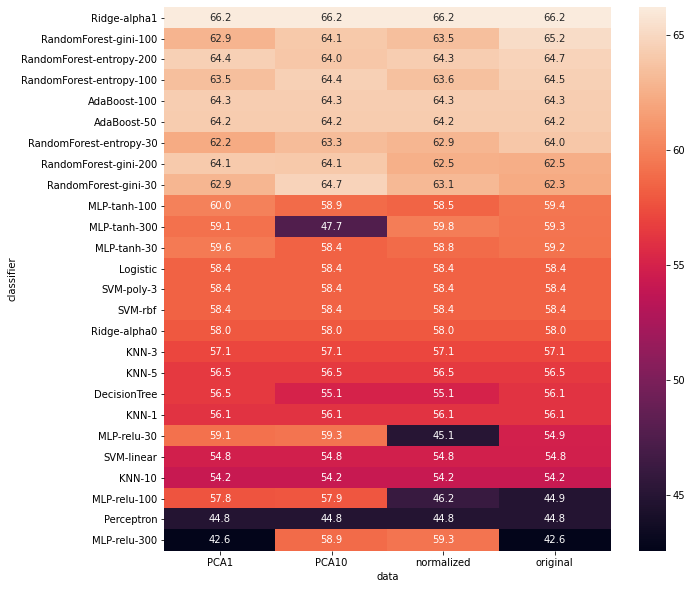

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(res_pivot, annot=True, fmt=".1f")
plt.show()

In [22]:
res_df.to_csv("training_results.csv", index=False)
res_pivot.to_csv("training_results_pivot.csv", index=False)

In [23]:
res_df

,data,classifier,train_acc,test_acc,time
0,original,Ridge-alpha1,67.776017,66.191607,0.056395
1,original,Ridge-alpha0,57.686212,57.957245,0.186470
2,original,Logistic,55.441099,58.432304,0.079098
3,original,Perceptron,47.173798,44.813935,0.050696
4,original,MLP-relu-30,52.905441,54.869359,0.449153
5,original,MLP-tanh-30,56.576862,59.224070,2.168834
6,original,MLP-relu-100,47.569995,44.893112,1.150113
7,original,MLP-tanh-100,55.863708,59.382423,1.709144
8,original,MLP-relu-300,45.615425,42.596991,2.842747
9,original,MLP-tanh-300,57.316429,59.303246,5.350462
